In [101]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sumedh1507/teen-phone-addiction")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'teen-phone-addiction' dataset.
Path to dataset files: /kaggle/input/teen-phone-addiction


In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [103]:
df = pd.read_csv("/root/.cache/kagglehub/datasets/sumedh1507/teen-phone-addiction/versions/1/teen_phone_addiction_dataset.csv")

In [104]:
df.head()

,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,Exercise_Hours,Anxiety_Level,Depression_Level,Self_Esteem,Parental_Control,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,1,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78,5,0.1,10,3,8,0,1.4,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0
1,2,Scott Rodriguez,17,Female,Theodorefort,7th,5.5,6.5,70,5,0.0,3,7,3,0,0.9,96,9,1.1,4.0,1.8,Browsing,2,5.3,10.0
2,3,Adrian Knox,13,Other,Lindseystad,11th,5.8,5.5,93,8,0.8,2,3,10,0,0.5,137,8,0.3,1.5,0.4,Education,6,5.7,9.2
3,4,Brittany Hamilton,18,Female,West Anthony,12th,3.1,3.9,78,8,1.6,9,10,3,0,1.4,128,7,3.1,1.6,0.8,Social Media,8,3.0,9.8
4,5,Steven Smith,14,Other,Port Lindsaystad,9th,2.5,6.7,56,4,1.1,1,5,1,0,1.0,96,20,2.6,0.9,1.1,Gaming,10,3.7,8.6


In [105]:
df.shape

(3000, 25)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      3000 non-null   int64  
 1   Name                    3000 non-null   object 
 2   Age                     3000 non-null   int64  
 3   Gender                  3000 non-null   object 
 4   Location                3000 non-null   object 
 5   School_Grade            3000 non-null   object 
 6   Daily_Usage_Hours       3000 non-null   float64
 7   Sleep_Hours             3000 non-null   float64
 8   Academic_Performance    3000 non-null   int64  
 9   Social_Interactions     3000 non-null   int64  
 10  Exercise_Hours          3000 non-null   float64
 11  Anxiety_Level           3000 non-null   int64  
 12  Depression_Level        3000 non-null   int64  
 13  Self_Esteem             3000 non-null   int64  
 14  Parental_Control        3000 non-null   

In [107]:
df.describe()

,ID,Age,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,Exercise_Hours,Anxiety_Level,Depression_Level,Self_Esteem,Parental_Control,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Family_Communication,Weekend_Usage_Hours,Addiction_Level
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,15.969667,5.020667,6.489767,74.947333,5.097667,1.040667,5.590000,5.460333,5.546333,0.507333,1.006733,83.093000,12.609333,2.499233,1.525267,1.016333,5.459667,6.015100,8.881900
std,866.169729,1.989489,1.956501,1.490713,14.684156,3.139333,0.734620,2.890678,2.871557,2.860754,0.500030,0.492878,37.747044,4.611486,0.988201,0.932701,0.648341,2.864572,2.014776,1.609598
min,1.000000,13.000000,0.000000,3.000000,50.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,20.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,750.750000,14.000000,3.700000,5.500000,62.000000,2.000000,0.500000,3.000000,3.000000,3.000000,0.000000,0.700000,51.000000,9.000000,1.800000,0.800000,0.500000,3.000000,4.700000,8.000000
50%,1500.500000,16.000000,5.000000,6.500000,75.000000,5.000000,1.000000,6.000000,5.000000,6.000000,1.000000,1.000000,82.000000,13.000000,2.500000,1.500000,1.000000,5.000000,6.000000,10.000000
75%,2250.250000,18.000000,6.400000,7.500000,88.000000,8.000000,1.500000,8.000000,8.000000,8.000000,1.000000,1.400000,115.250000,17.000000,3.200000,2.200000,1.500000,8.000000,7.400000,10.000000
max,3000.000000,19.000000,11.500000,10.000000,100.000000,10.000000,4.000000,10.000000,10.000000,10.000000,1.000000,2.600000,150.000000,20.000000,5.000000,4.000000,3.000000,10.000000,14.000000,10.000000


In [108]:
df.isnull().sum()

,0
ID,0
Name,0
Age,0
Gender,0
Location,0
School_Grade,0
Daily_Usage_Hours,0
Sleep_Hours,0
Academic_Performance,0
Social_Interactions,0


In [109]:
df.duplicated().sum()

np.int64(0)

In [110]:
categorical = df.select_dtypes(include=["object","category"]).columns
numerical = df.select_dtypes(include=["int64","float64"]).columns
print(f"Categorical: {categorical}")
print(f"Numerical: {numerical}")

Categorical: Index(['Name', 'Gender', 'Location', 'School_Grade', 'Phone_Usage_Purpose'], dtype='object')
Numerical: Index(['ID', 'Age', 'Daily_Usage_Hours', 'Sleep_Hours', 'Academic_Performance',
       'Social_Interactions', 'Exercise_Hours', 'Anxiety_Level',
       'Depression_Level', 'Self_Esteem', 'Parental_Control',
       'Screen_Time_Before_Bed', 'Phone_Checks_Per_Day', 'Apps_Used_Daily',
       'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education',
       'Family_Communication', 'Weekend_Usage_Hours', 'Addiction_Level'],
      dtype='object')


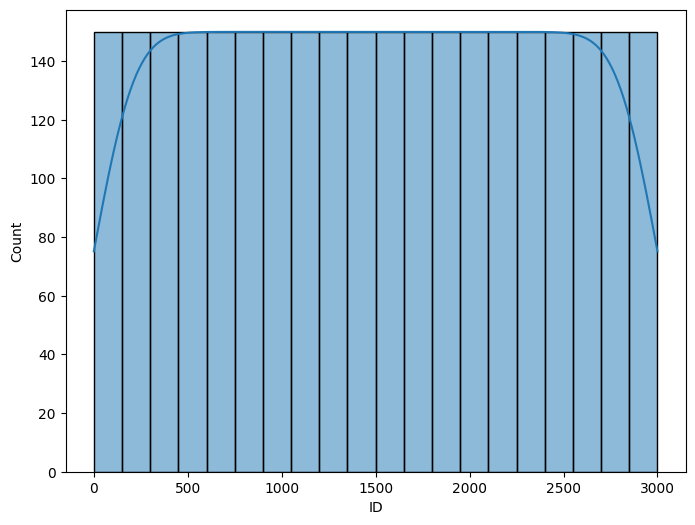

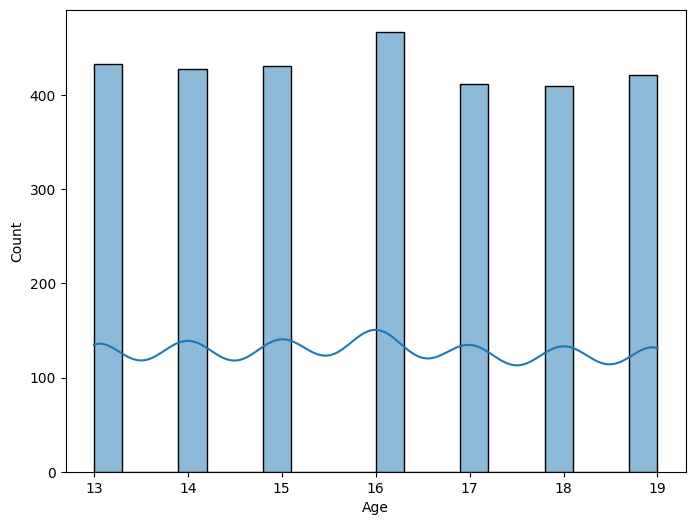

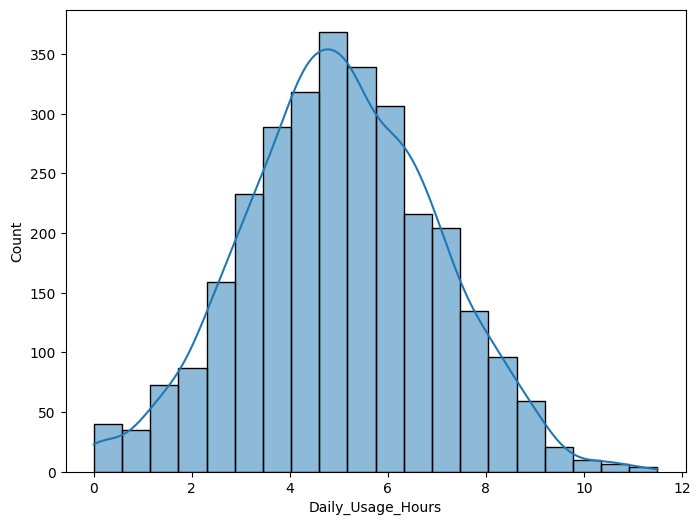

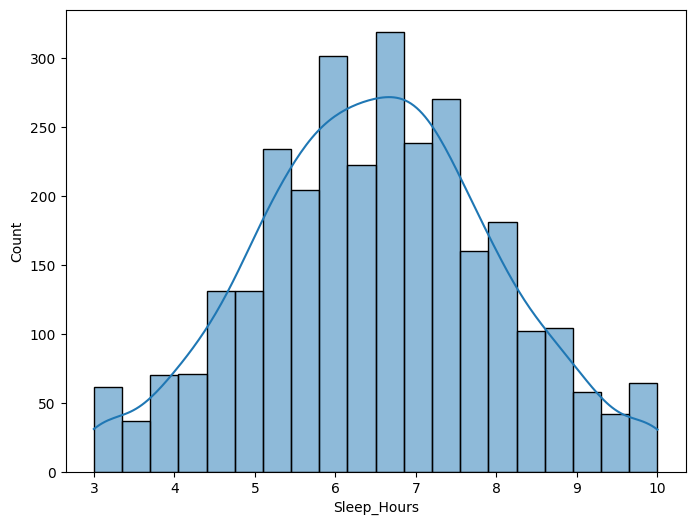

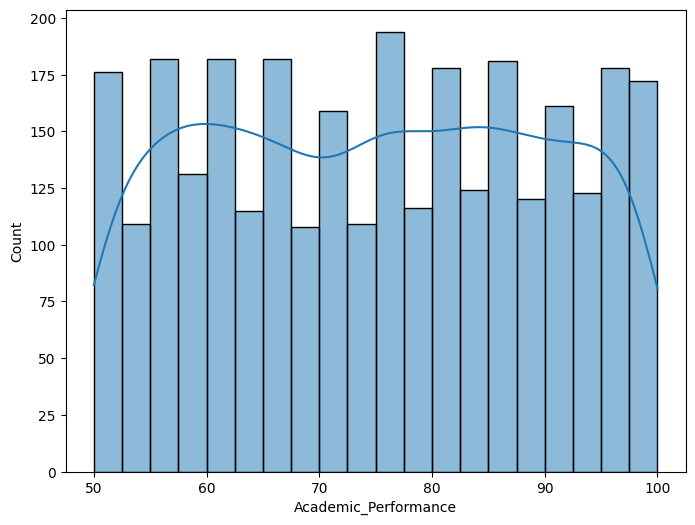

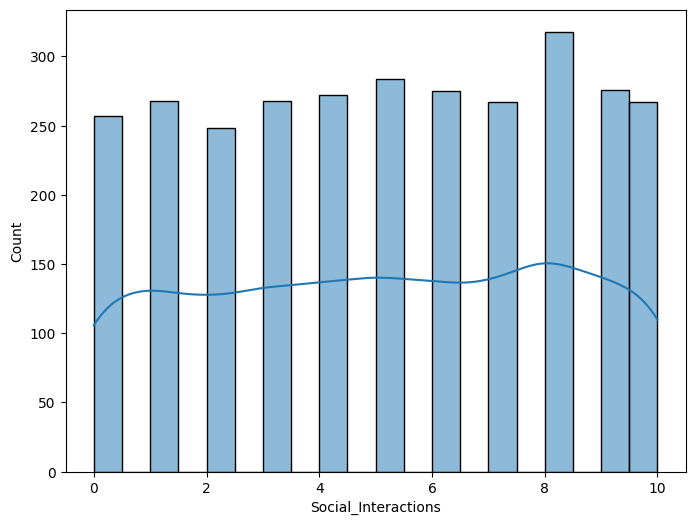

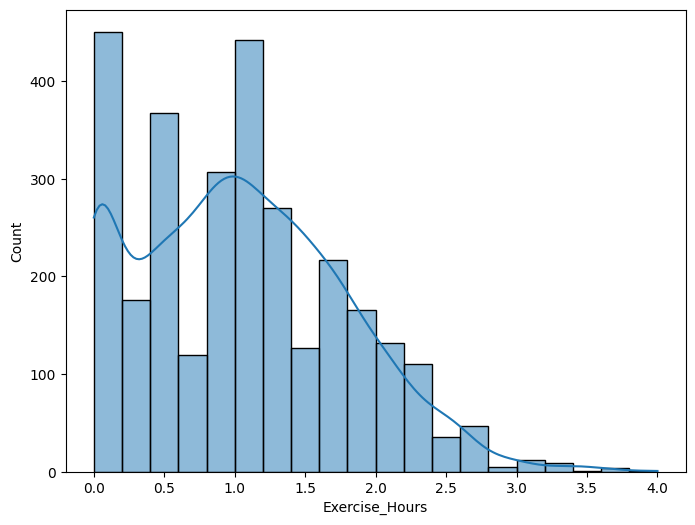

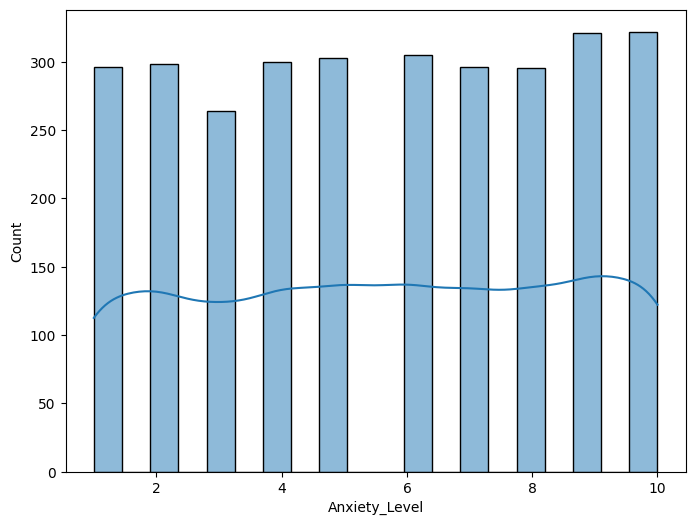

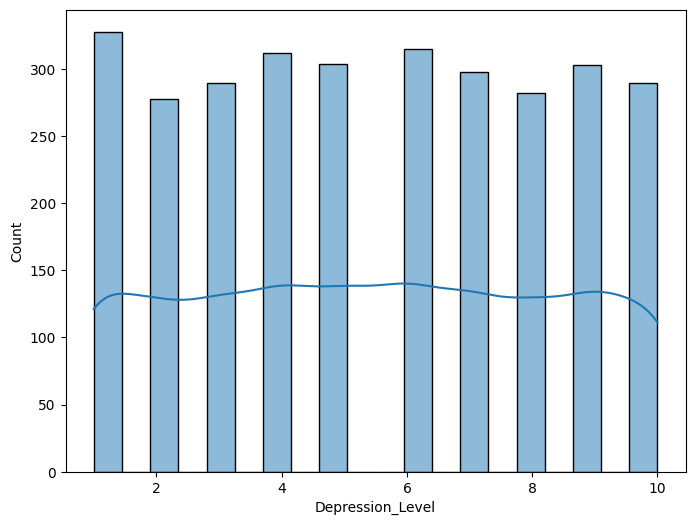

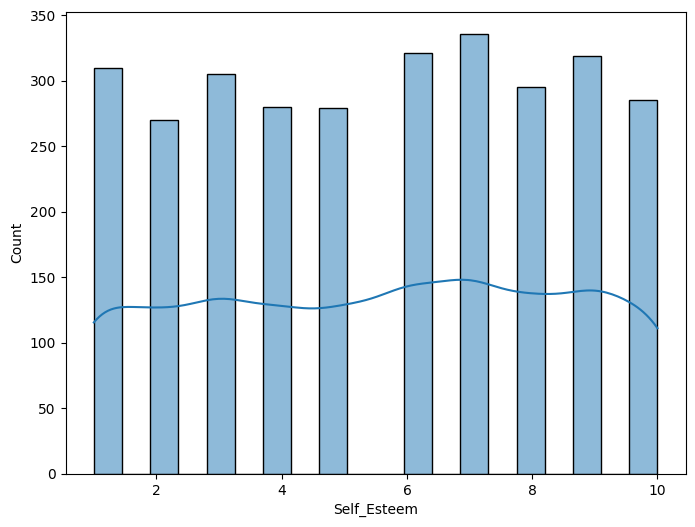

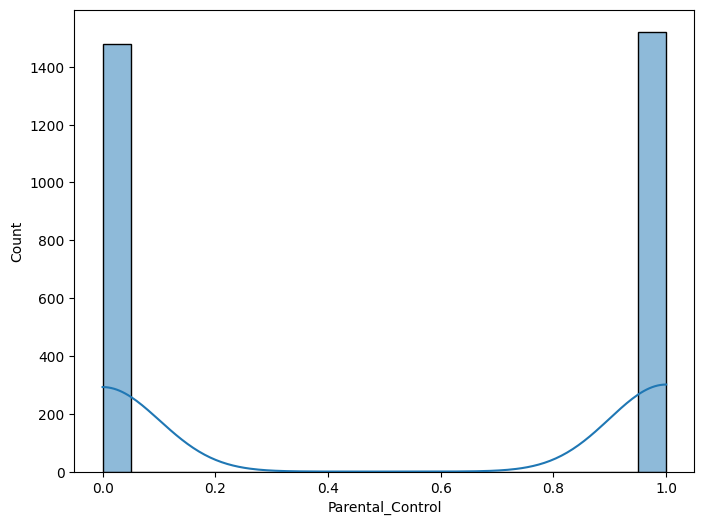

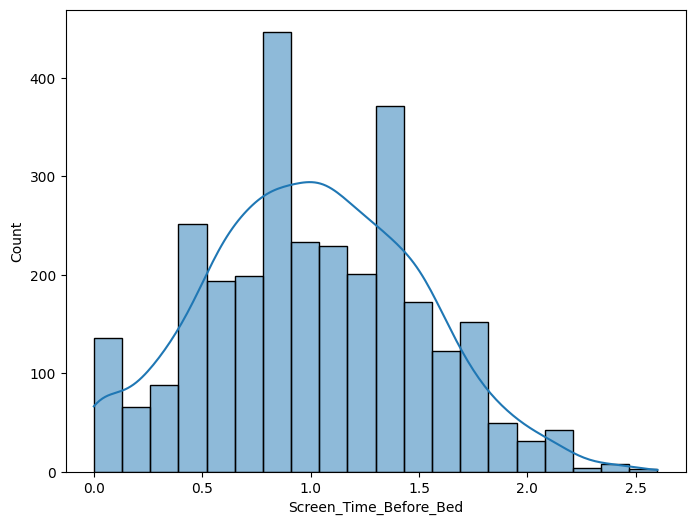

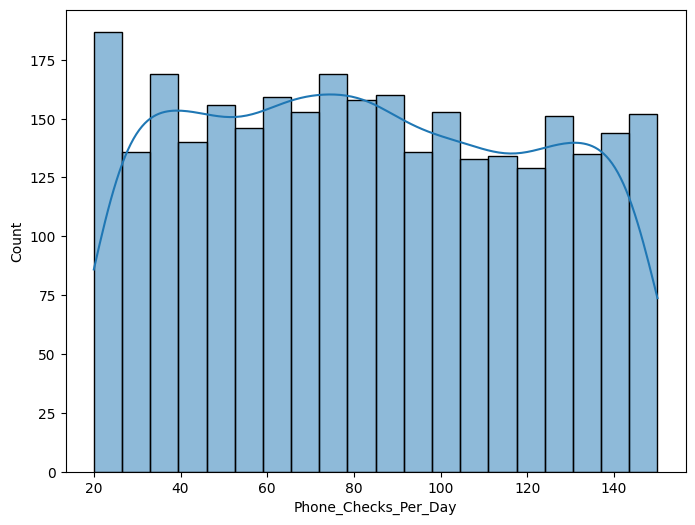

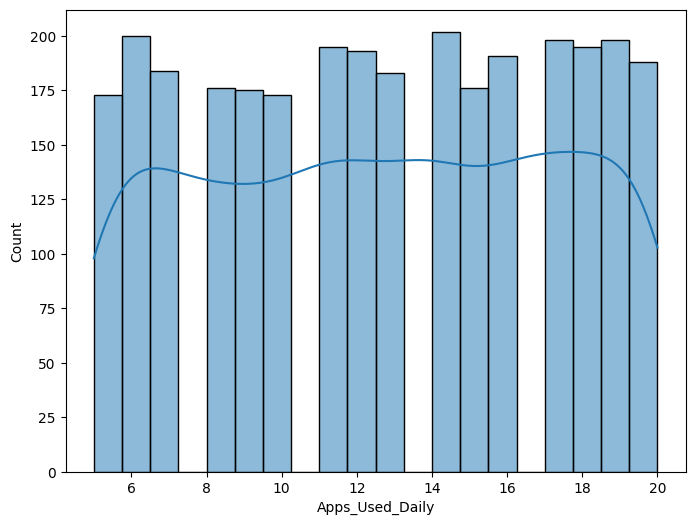

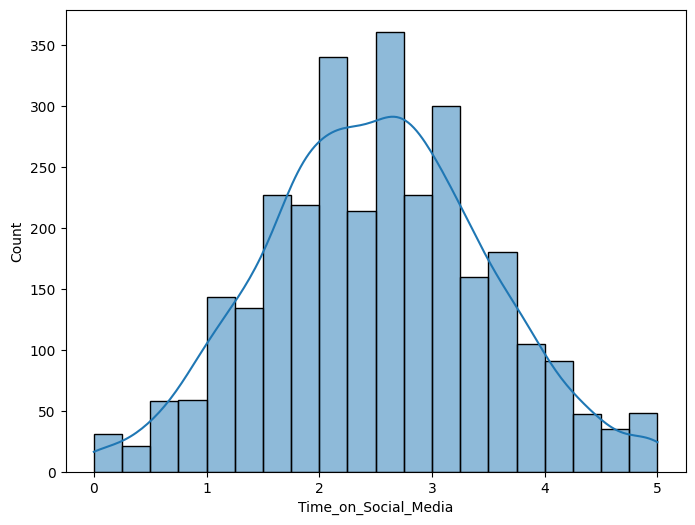

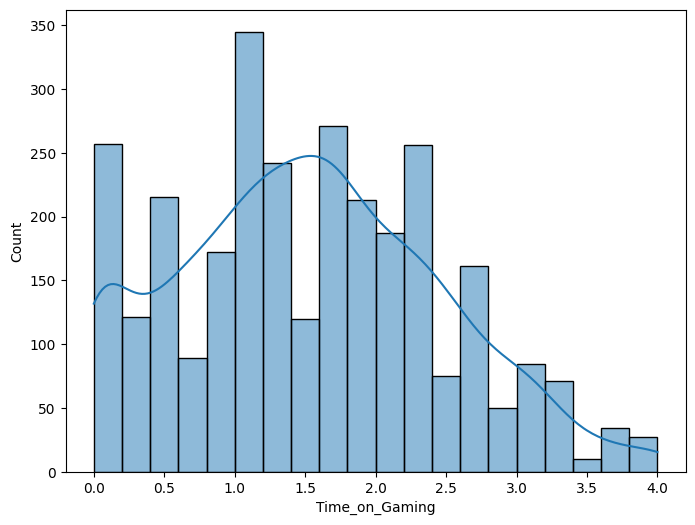

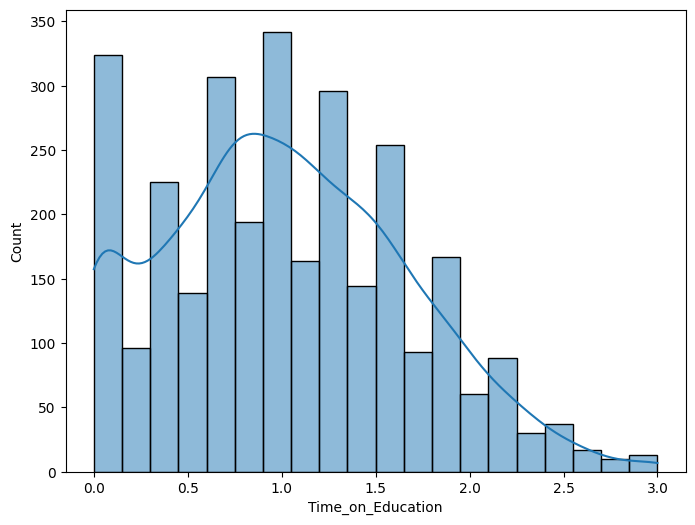

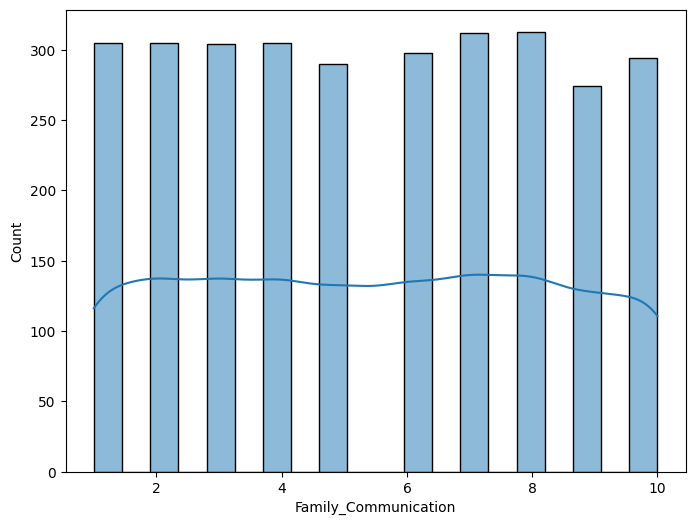

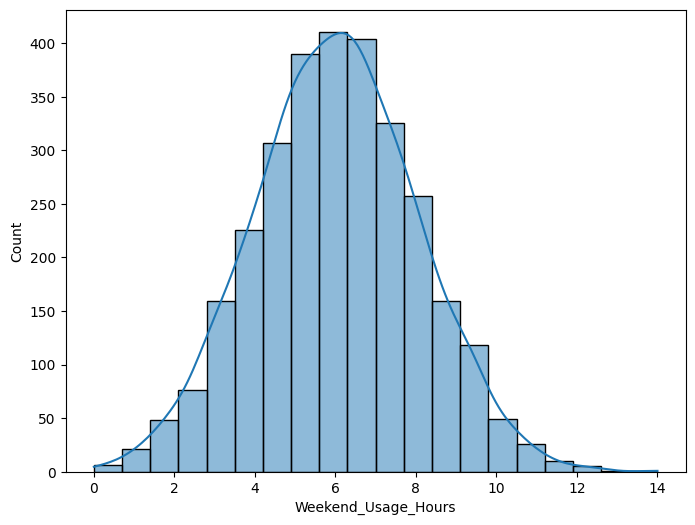

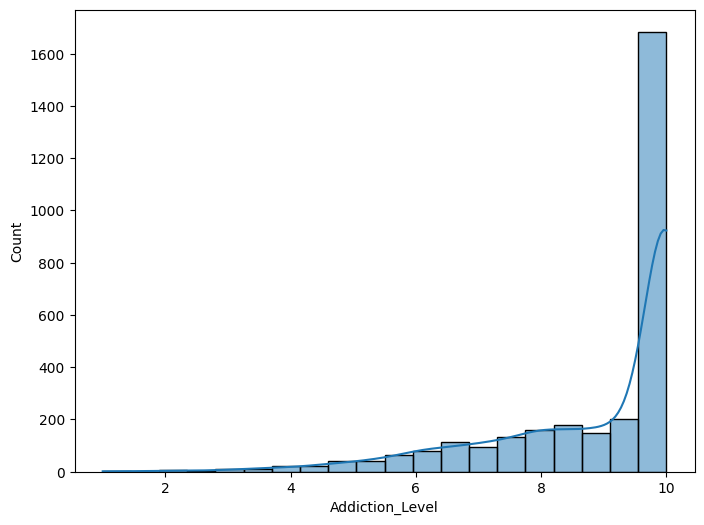

In [111]:
for col in numerical:
  plt.figure(figsize=(8,6))
  sns.histplot(df[col],kde=True,bins=20)

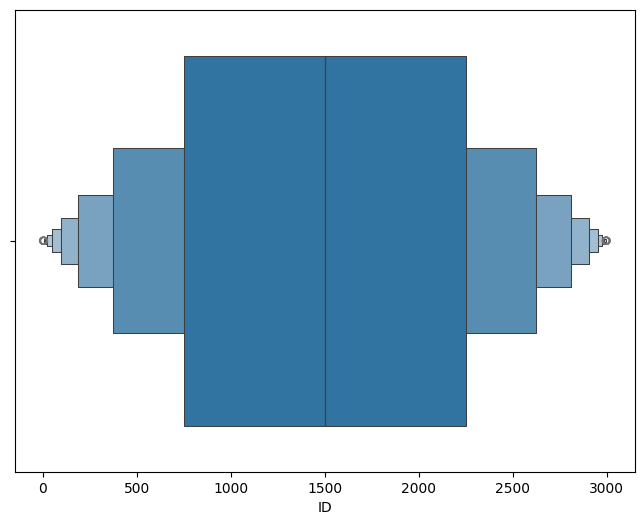

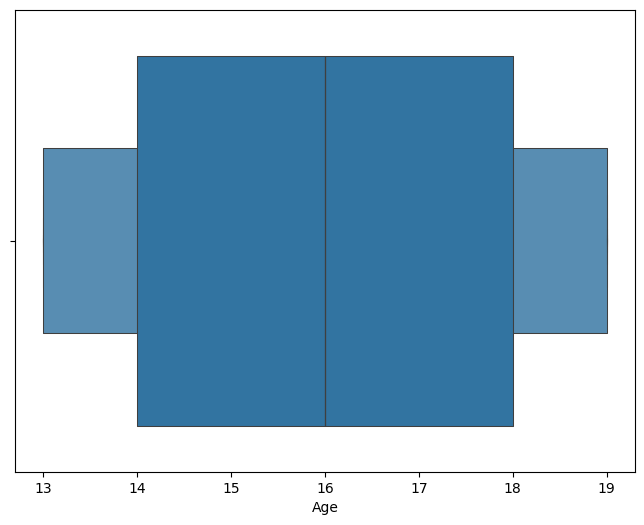

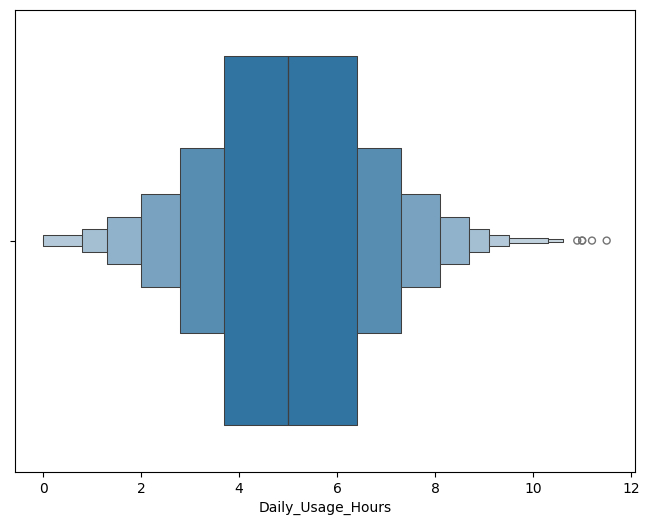

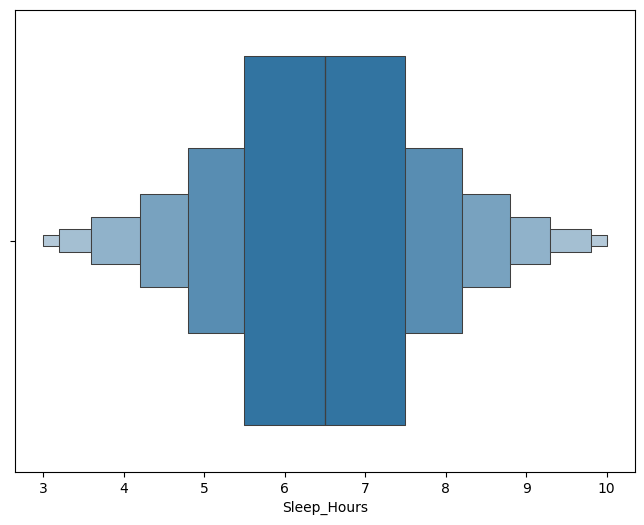

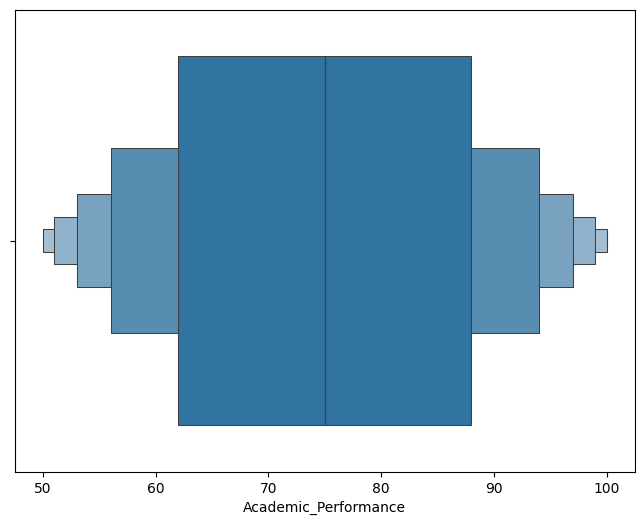

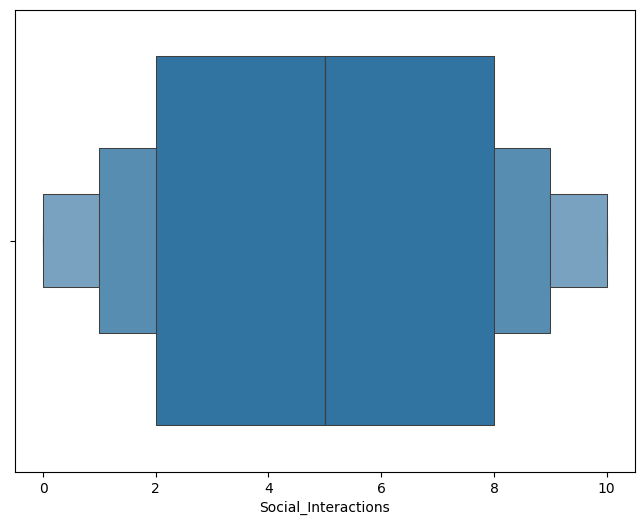

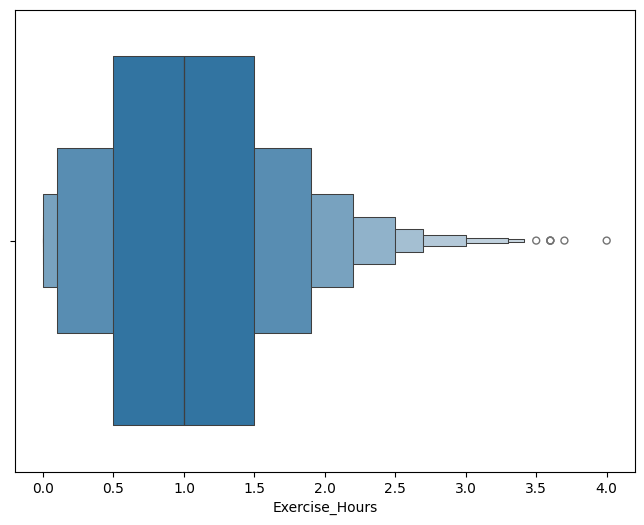

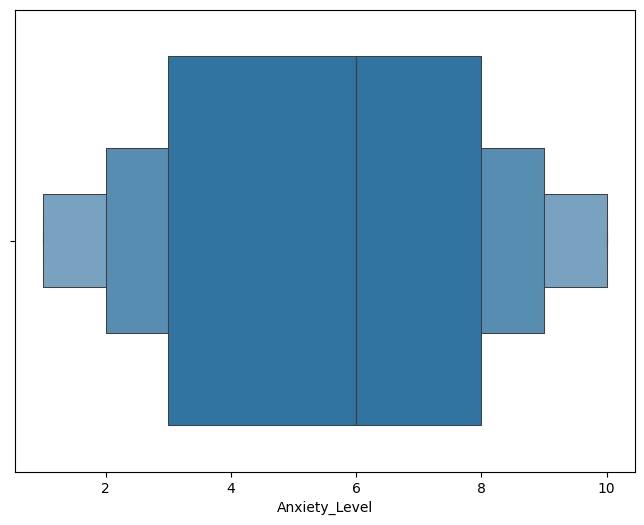

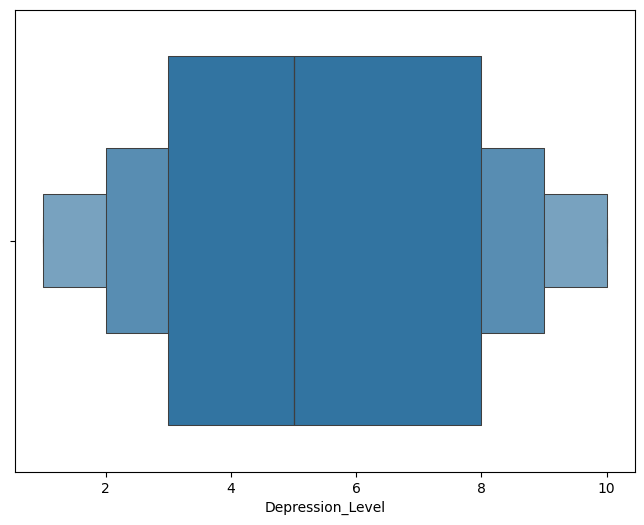

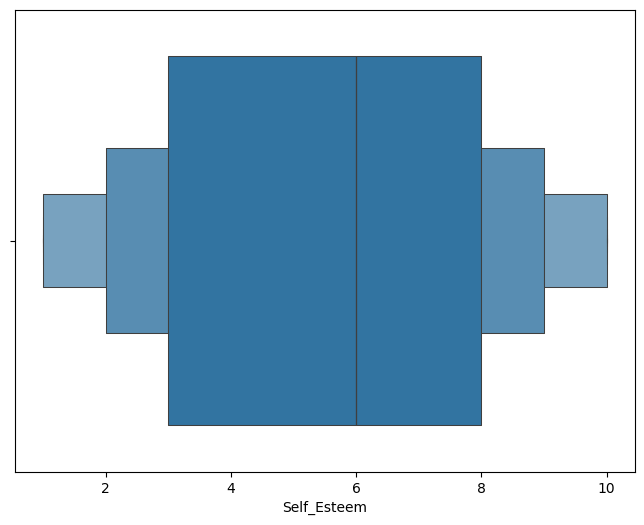

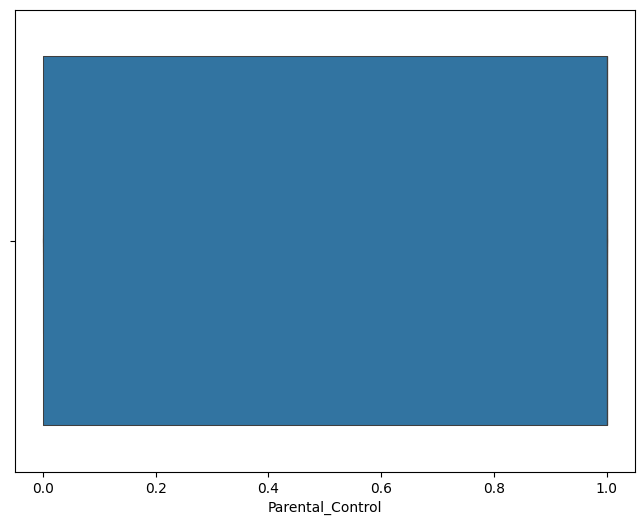

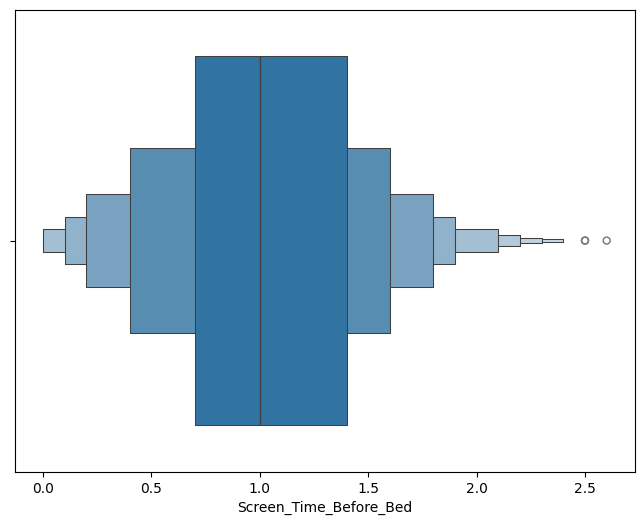

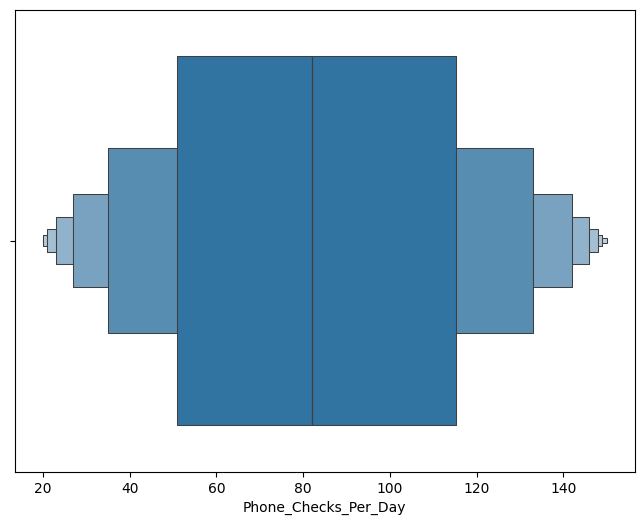

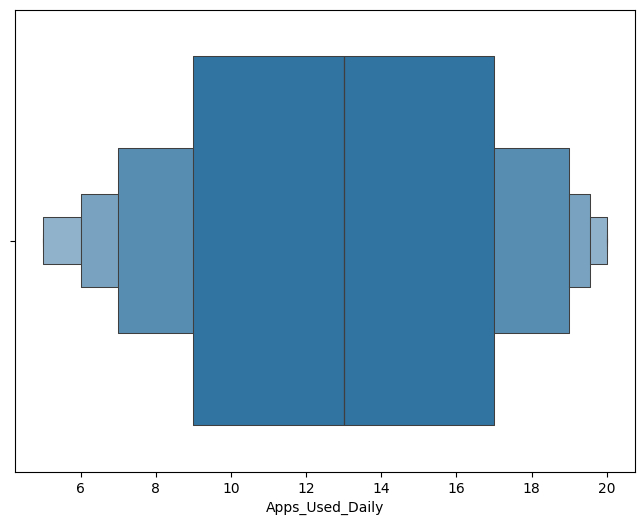

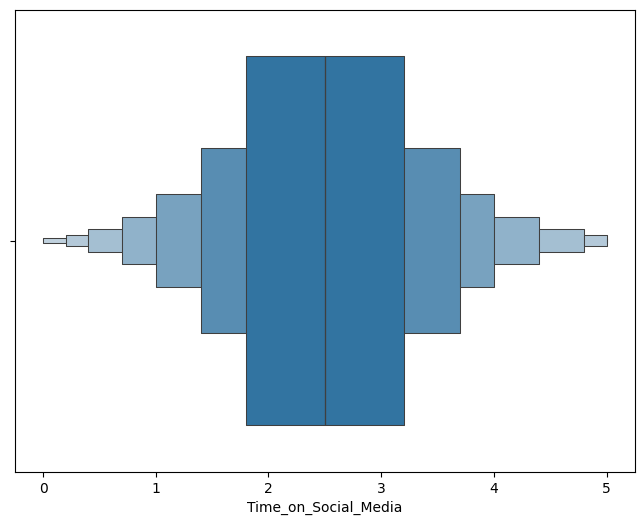

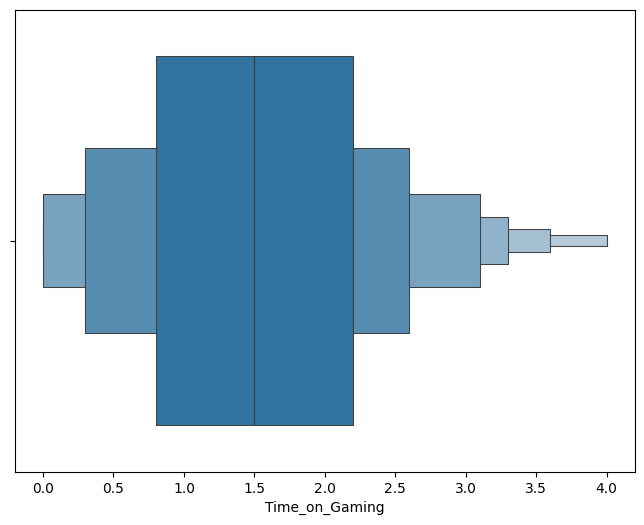

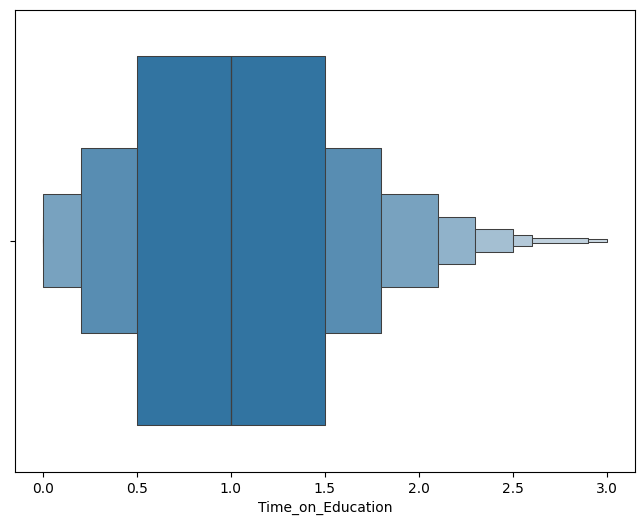

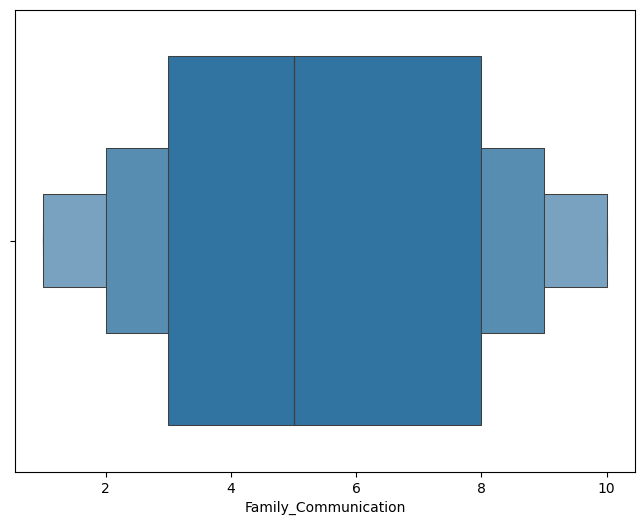

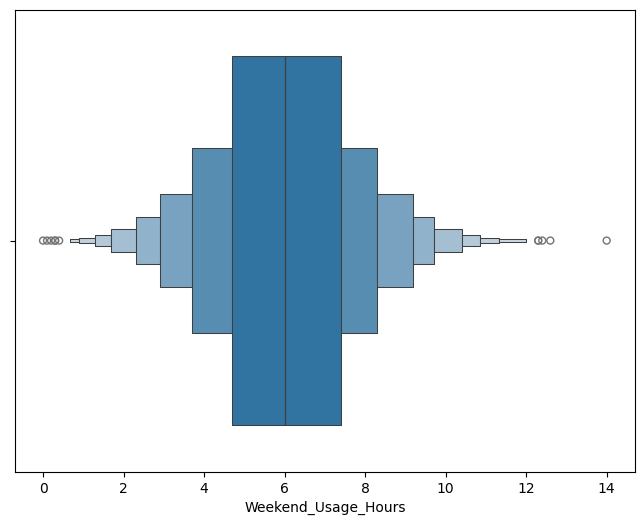

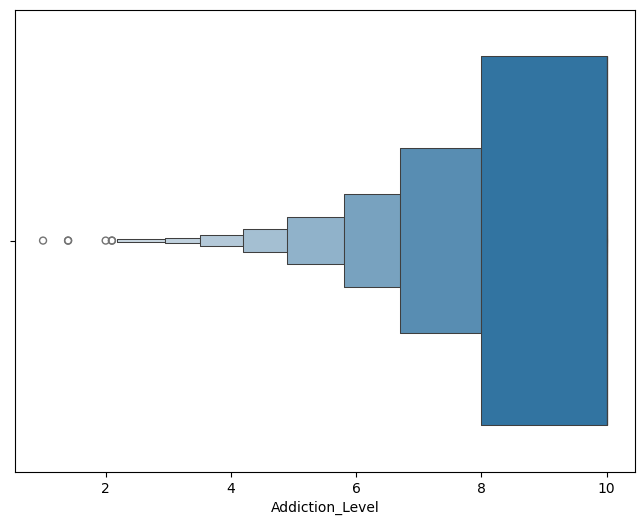

In [112]:
for col in numerical:
  plt.figure(figsize=(8,6))
  sns.boxenplot(x=df[col])

In [ ]:
for col in categorical:
  plt.figure(figsize=(8,6))
  sns.countplot(df[col])

In [ ]:
plt.figure(figsize=(20,18))
sns.heatmap(df[numerical].corr(),annot=True)

In [ ]:
le = LabelEncoder()

In [ ]:
oh = OneHotEncoder()

In [ ]:
scaler = StandardScaler()

In [ ]:
label_en = [col for col in categorical if df[col].nunique() == 2]
hot_en = [col for col in categorical if df[col].nunique() > 2]
print(f"Label: {label_en}")
print(f"Hot: {hot_en}")
print(f"categorical: {categorical}")

In [ ]:
for col in label_en:
  df[col] = le.fit_transform(df[col])

In [ ]:
for col in hot_en:
  df[col] = oh.fit_transform(df[[col]]).toarray()

In [ ]:
df.head()

In [ ]:
X = df.drop("Addiction_Level",axis=1)
# Define bins and labels for discretization
bins = [0, 5, 8, 10]
labels = ['Low', 'Medium', 'High']
df['Addiction_Level_Category'] = pd.cut(df['Addiction_Level'], bins=bins, labels=labels, include_lowest=True)

# Drop the original continuous target column
df = df.drop("Addiction_Level", axis=1)

# Reassign the target variable to the new categorical column
y = df["Addiction_Level_Category"]

# Apply Label Encoding to the categorical target variable
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
X_test

In [ ]:
models = {
    'Logistic Regression': (LogisticRegression(max_iter=1000), {
        'C': [0.1, 1, 10],
        'solver': ['lbfgs', 'liblinear']
    }),
    'KNN': (KNeighborsClassifier(), {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    }),
    'Naive Bayes': (GaussianNB(), {}),
    'Decision Tree': (DecisionTreeClassifier(), {
        'max_depth': [3, 5, 10, None],
        'criterion': ['gini', 'entropy']
    }),
    'Random Forest': (RandomForestClassifier(), {
        'n_estimators': [50, 100, 200],
        'max_depth': [5, 10, None]
    }),
    'SVM': (SVC(), {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf', 'poly']
    })
}

In [ ]:
best_models = {}
results = []

In [ ]:
for name, (model, params) in models.items():
    print(f"\n🔍 Training {name}...")
    grid = GridSearchCV(model, params, cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)

    y_pred = grid.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"✅ {name} Accuracy: {acc:.3f}")
    print(classification_report(y_test, y_pred))

    best_models[name] = grid.best_estimator_
    results.append((name, acc, grid.best_params_))

In [ ]:
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Best_Params'])
print(results_df.sort_values(by='Accuracy', ascending=False))

In [ ]:
results_df

In [ ]:
df.head()

In [ ]:
best_models

In [ ]:
best_model_name = results_df.iloc[0]['Model']
best_model = best_models[best_model_name]

In [ ]:
best_model

In [ ]:
import joblib

In [ ]:
import os

os.makedirs("models", exist_ok=True)

joblib.dump(scaler, "models/scaler.pkl")
joblib.dump(best_model, f"models/{best_model_name.replace(' ', '_')}.pkl")

print(f"\n🎯 Best model saved: {best_model_name}")
print("📁 Scaler saved: models/scaler.pkl")